<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1.  Does the report include a section describing the data?
2.  Does the report include a paragraph detailing the main objective(s) of this analysis?
3.  Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4.  Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5.  Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?


## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# !mamba install opendatasets
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# may be you should create kaggle api key to download this dataset
import opendatasets as od
od.download('https://www.kaggle.com/datasets/mirichoi0218/insurance/download/vVsoyMKmbcXFPe9BlDvJ%2Fversions%2FpDFUu2gxNTzfrHiqzyPE%2Ffiles%2Finsurance.csv?datasetVersionNumber=1')

Skipping, found downloaded files in ".\insurance" (use force=True to force download)


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
df = pd.read_csv('insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*   A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*   Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*   Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
categorical_df = df.select_dtypes('O')
categorical_df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
numerical_df = df[list(set(df) - set(categorical_df))]
numerical_df.describe()

,children,bmi,age,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,1.094918,30.663397,39.207025,13270.422265
std,1.205493,6.098187,14.049960,12110.011237
min,0.000000,15.960000,18.000000,1121.873900
25%,0.000000,26.296250,27.000000,4740.287150
50%,1.000000,30.400000,39.000000,9382.033000
75%,2.000000,34.693750,51.000000,16639.912515
max,5.000000,53.130000,64.000000,63770.428010


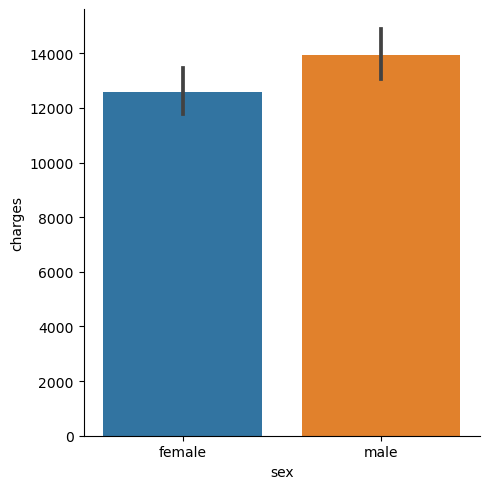

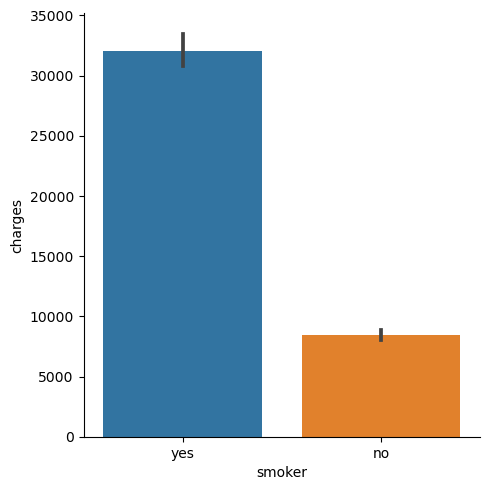

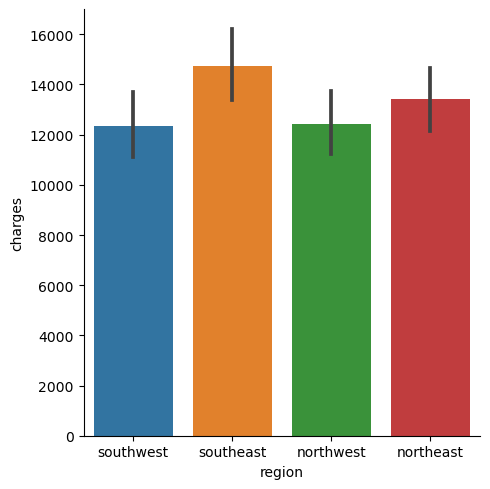

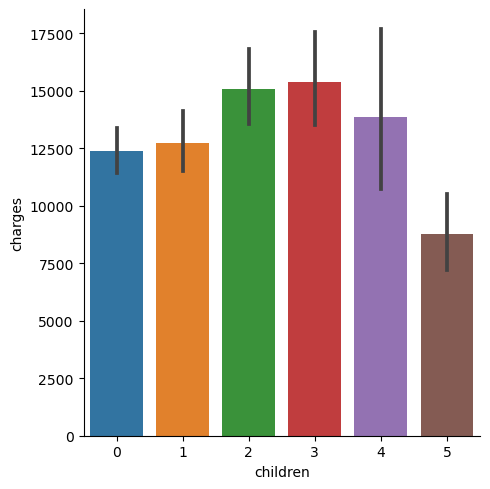

In [7]:
# show does charges is influenced by sex, smoker, region and children
[sns.catplot(x=col, y='charges', data=df, kind='bar') for col in categorical_df.columns.tolist() + ['children']]
plt.show()

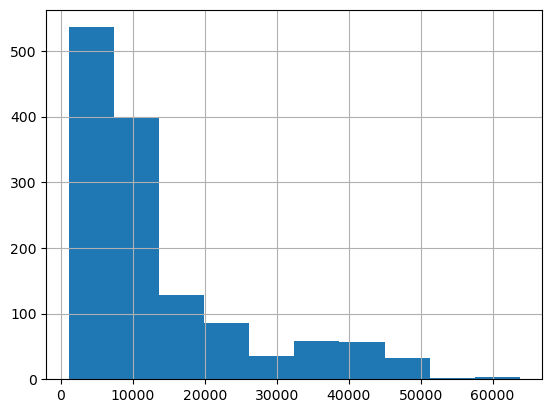

In [8]:
# check distibution of target
df['charges'].hist()
plt.show()

skew right so use np.log1p to change

<AxesSubplot: >

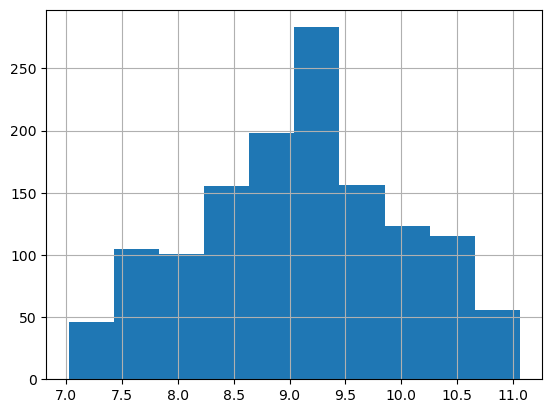

In [9]:
df['charges'] = df['charges'].apply(np.log1p)
df['charges'].hist()

<Figure size 1000x500 with 0 Axes>

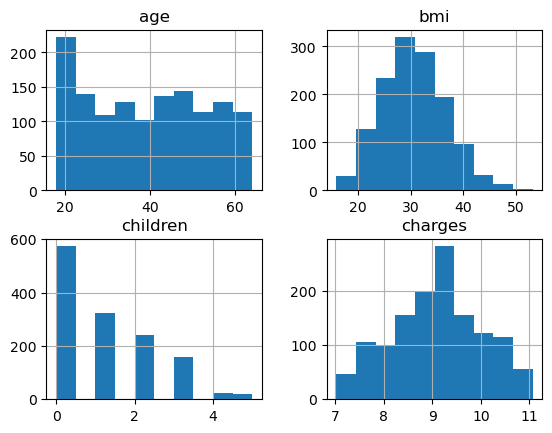

In [10]:
# this distribution is oke
plt.figure(figsize=(10, 5))
df.hist()
plt.show()

# 2. Objectives


Predict Charges with Regression model, so have to see relationship between target and feature.
Moreover, build the model that can help reduce RMSE as small as possible

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
# One hot encoding
df = pd.get_dummies(df, columns=categorical_df.columns, drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734236,0,1,0,0,1
1,18,33.770,1,7.453882,1,0,0,1,0
2,28,33.000,3,8.400763,1,0,0,1,0
3,33,22.705,0,9.998137,1,0,1,0,0
4,32,28.880,0,8.260455,1,0,1,0,0


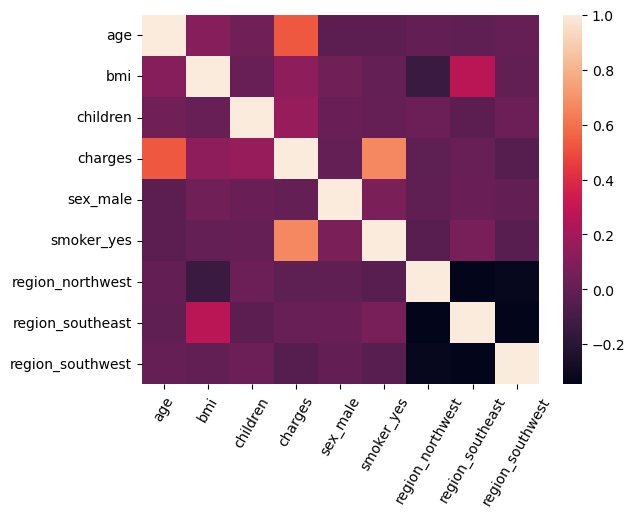

In [13]:
# check correlation for predict
df_corr = df.corr()
sns.heatmap(df_corr)
plt.xticks(rotation = 60)
plt.show()

The correlation is slightly slow

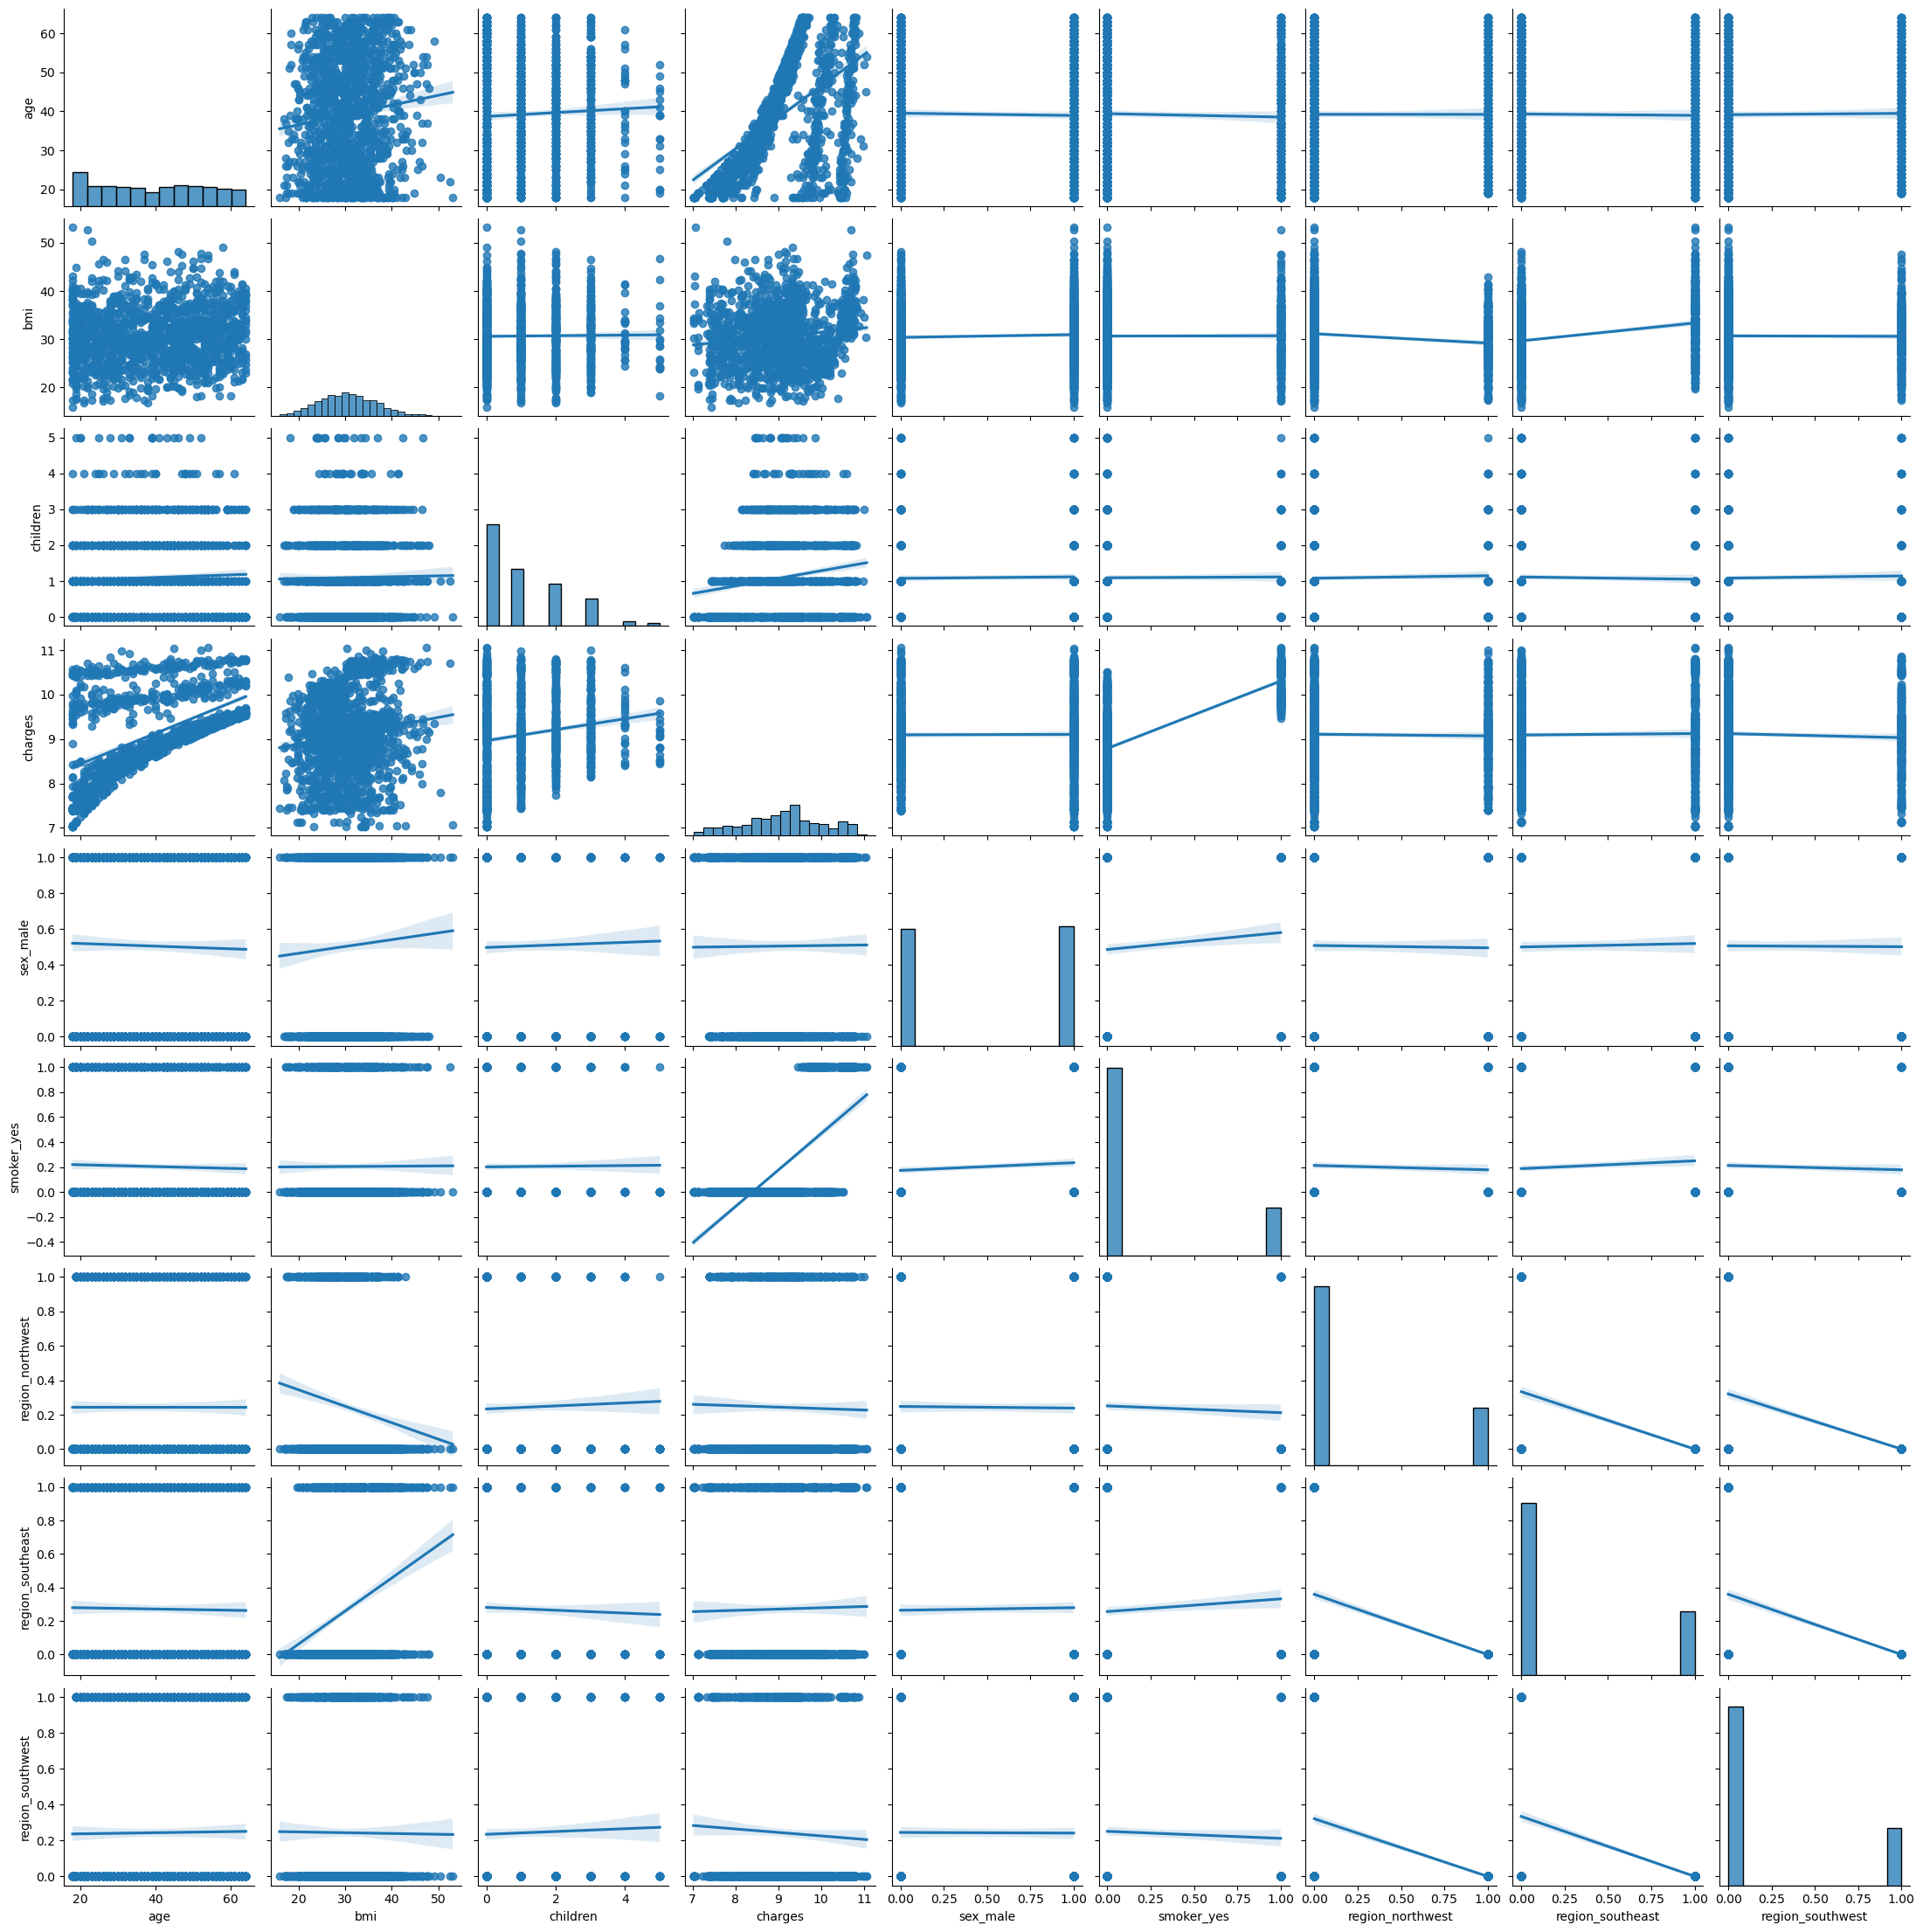

In [14]:
sns.pairplot(df, kind='reg')
plt.show()

# 3. Linear Regression Models


Train test split

In [15]:
def valuation(y_true, y_pred):
    print('R_2 score:', r2_score(y_true, y_pred))
    print('MSE:', mean_squared_error(y_true, y_pred))

In [16]:
X = df.drop(columns=['charges'])
y = df['charges']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=14075)

Linear regression model

In [18]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_hat = linear.predict(X_test)
valuation(y_test, y_hat)

R_2 score: 0.7819270517279456
MSE: 0.18452950395277146


Polynomial linear regression model

In [19]:
pipe = Pipeline([('poly', PolynomialFeatures(include_bias=False, degree=2)), ('ss', StandardScaler()), ('linear', LinearRegression())])
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
valuation(y_test, y_hat)

R_2 score: 0.8427115275126366
MSE: 0.13309474666877666


Ridge regression model

In [20]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]

In [21]:
pipe = Pipeline([('poly', PolynomialFeatures(include_bias=False, degree=2)), ('ss', StandardScaler()), ('linear', RidgeCV(alphas=alphas))])
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
valuation(y_test, y_hat)

R_2 score: 0.8433487996381317
MSE: 0.13255549817357198


Lasso regression model

In [22]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]

In [23]:
pipe = Pipeline([('poly', PolynomialFeatures(include_bias=False, degree=2)), ('ss', StandardScaler()), ('linear', LassoCV(alphas=alphas))])
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
valuation(y_test, y_hat)

R_2 score: 0.8439050955733048
MSE: 0.13208477031034166


ElasticNet regression model

In [24]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
l1_ratio = [0.1, 0.2, 0.3, 0.4, 0.4, 0.6, 0.7, 0.8, 0.9]

In [25]:
pipe = Pipeline([('poly', PolynomialFeatures(include_bias=False, degree=2)), ('ss', StandardScaler()), ('linear', ElasticNetCV(alphas=alphas, l1_ratio=l1_ratio))])
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
valuation(y_test, y_hat)

R_2 score: 0.8439826040206723
MSE: 0.13201918402163332


# 4. Insights and key findings


In [26]:
def plot_rmse_alpha(model_type):
    MSE=[]
    coefs = []
    for alpha in alphas:
        model = model_type(alpha=alpha)
        model.fit(X_train, y_train)
        coefs.append(abs(model.coef_))
        y_pred = model.predict(X_test)
        MSE.append(mean_squared_error(y_test, y_pred))

    ax = plt.gca()
    ax.plot(alphas, MSE)
    ax.set_xscale("log")
    plt.xlabel("alpha")
    plt.ylabel("$MSE$")
    plt.title("$MSE$ as a function of the regularization")
    plt.show()  

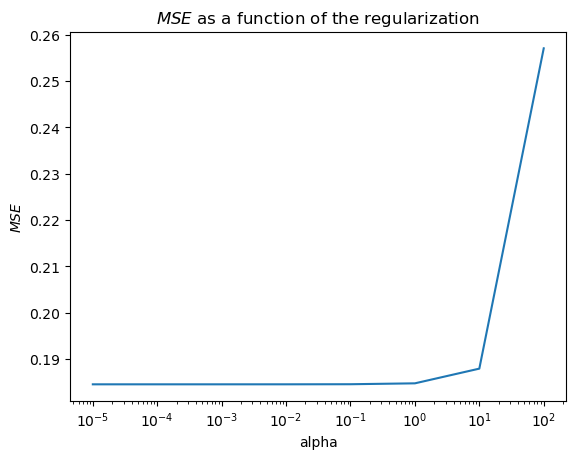

In [27]:
plot_rmse_alpha(Ridge)

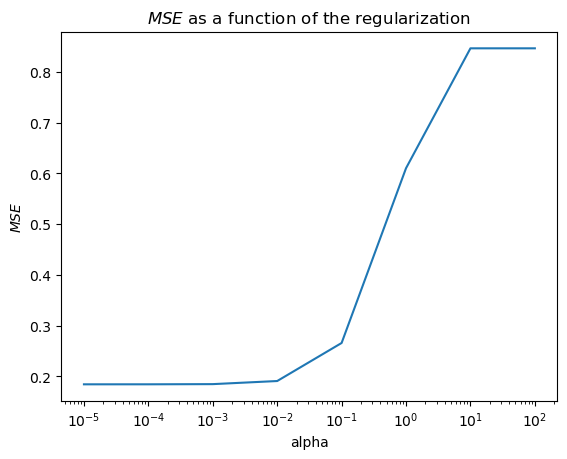

In [28]:
plot_rmse_alpha(Lasso)

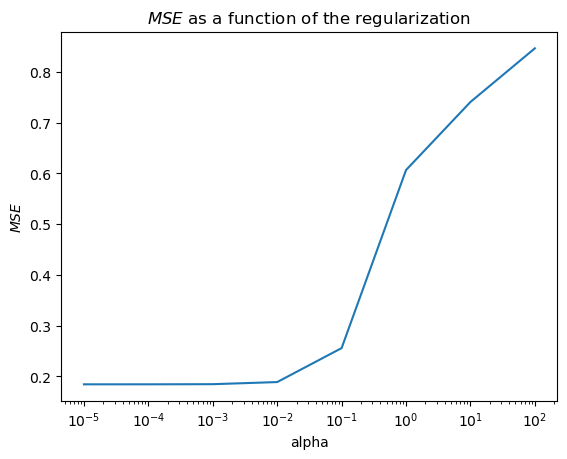

In [29]:
plot_rmse_alpha(ElasticNet)

The regularization is not effective in this model because this model is not overfit and not high variance

# 5. Next Steps


To improve, this model we can use the new technique like stochastic Gradient Descent (SGD)

In [30]:
from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': 1e-5},
    'Ridge': {'penalty': 'l1',
           'alpha': 1e-5},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': 1e-5,
                   'l1_ratio': 0.5}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-3, **parameters,tol=0.0001, max_iter=1000)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = mean_squared_error(y_test, SGD.predict(X_test))

eval = pd.Series(new_rmses).to_frame()
eval.rename(columns={0:'MSE-SGD-learningrate'})

,MSE-SGD-learningrate
Linear,1.251580
Lasso,1.143680
Ridge,1.166818
ElasticNet,1.351450


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
